In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# Initialize OneHotEncoder

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


# Lists to store data and labels
data = []
result = []

# Process images in the 'Control' directory
for file in os.listdir(r'C:\Users\sucha\Downloads\MLLAB\train\Control'):
    if file.endswith('.jpg'):
        img = Image.open(os.path.join(r'C:\Users\sucha\Downloads\MLLAB\train\Control', file))
        img = img.resize((128,128))
        img = np.array(img)
        if img.shape == (128,128,3):
            data.append(np.array(img))
            result.append(encoder.transform([[0]]).toarray())

# Process images in the 'PD' directory
for file in os.listdir(r"C:\Users\sucha\Downloads\MLLAB\train\PD"):
    if file.endswith('.jpg'):
        img = Image.open(os.path.join(r"C:\Users\sucha\Downloads\MLLAB\train\PD", file))
        img = img.resize((128,128))
        img = np.array(img)
        if img.shape == (128,128,3):
            data.append(np.array(img))
            result.append(encoder.transform([[1]]).toarray())



# Split the data into training and testing sets
result = np.array(result)
result = result.reshape(-1, 2)  # Reshape to have two columns for one-hot encoding

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

In [ ]:
y_train.shape

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

In [26]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


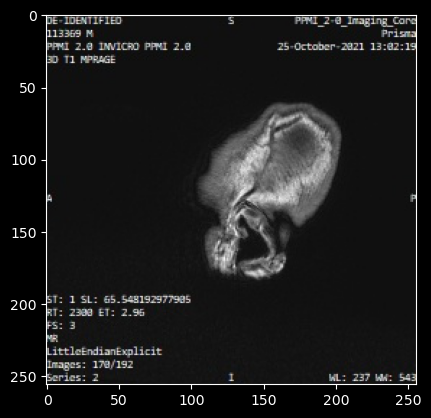

In [31]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\sucha\Downloads\MLLAB\test\Control\img-00002-00170.jpg")
x = np.array(img.resize((128,128)))
classifications = "tumour"
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A tumour


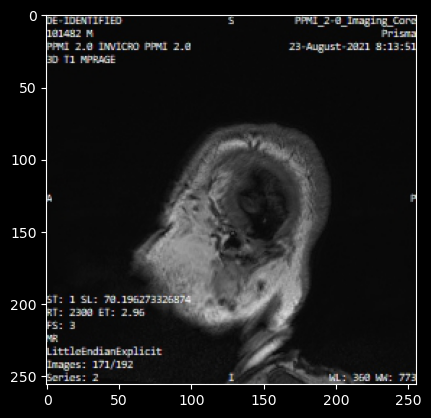

In [29]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\sucha\Downloads\MLLAB\test\PD\img-00002-00171.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + classifications)